In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

In [2]:
# Define column names based on the header in the SRL file
column_names = [
    "Source_id", "Isl_id", "RA", "E_RA", "DEC", "E_DEC", "Total_flux", "E_Total_flux",
    "Peak_flux", "E_Peak_flux", "RA_max", "E_RA_max", "DEC_max", "E_DEC_max", "Maj", 
    "E_Maj", "Min", "E_Min", "PA", "E_PA", "Maj_img_plane", "E_Maj_img_plane", 
    "Min_img_plane", "E_Min_img_plane", "PA_img_plane", "E_PA_img_plane", "DC_Maj", 
    "E_DC_Maj", "DC_Min", "E_DC_Min", "DC_PA", "E_DC_PA", "DC_Maj_img_plane", 
    "E_DC_Maj_img_plane", "DC_Min_img_plane", "E_DC_Min_img_plane", "DC_PA_img_plane", 
    "E_DC_PA_img_plane", "Isl_Total_flux", "E_Isl_Total_flux", "Isl_rms", "Isl_mean", 
    "Resid_Isl_rms", "Resid_Isl_mean", "S_Code"
]

In [18]:
# Assuming 'file.srl' is the SRL file
srl_file_path_1 = '../server/noise_detecting/03:32:04.530001_+31.05.04.00000-mosaic-fieldALL-StokesI-2.5arc-5000-1e-4-spwALL-pb0.06-cyclenit500.image.pybdsf.srl'
srl_file_path_2 = '../server/noise_detecting/03:36:00.000000_+30.30.00.00001-mosaic-fieldALL-StokesI-2.5arc-5000-1e-4-spwALL-pb0.06-cyclenit500.image.pybdsf.srl'
srl_file_path_4 = '../server/noise_detecting/03:25:30.000000_+29.29.59.99999-mosaic-fieldALL-StokesI-2.5arc-5000-1e-4-spwALL-pb0.06-cyclenit500.image.pybdsf.srl'

In [19]:
# Read the SRL file into a DataFrame
df_1 = pd.read_csv(srl_file_path_1, delim_whitespace=True, comment='#', names=column_names)
df_2 = pd.read_csv(srl_file_path_2, delim_whitespace=True, comment='#', names=column_names)
df_4 = pd.read_csv(srl_file_path_3, delim_whitespace=True, comment='#', names=column_names)

In [68]:
merged_data = pd.concat([df_1, df_2, df_4], ignore_index=True)

In [69]:
merged_data

,Source_id,Isl_id,RA,E_RA,DEC,E_DEC,Total_flux,E_Total_flux,Peak_flux,E_Peak_flux,...,E_DC_Min_img_plane,DC_PA_img_plane,E_DC_PA_img_plane,Isl_Total_flux,E_Isl_Total_flux,Isl_rms,Isl_mean,Resid_Isl_rms,Resid_Isl_mean,S_Code
0,0,0,54.310933,0.000666,31.250419,0.000414,0.001827,0.000236,0.001143,0.000098,...,0.000905,102.082591,13.432194,0.001216,0.000077,0.000092,-0.000023,0.000038,-0.000023,S
1,1,1,54.171368,0.001042,31.298449,0.000766,0.000560,0.000178,0.000544,0.000100,...,0.001743,0.000000,45.318135,0.000331,0.000064,0.000100,-0.000016,0.000004,-0.000016,S
2,2,2,54.161745,0.000880,31.107435,0.001511,0.000629,0.000206,0.000461,0.000095,...,0.002031,0.000000,32.557066,0.000341,0.000059,0.000091,-0.000008,0.000006,-0.000008,S
3,3,3,54.151808,0.000727,31.277171,0.000738,0.000688,0.000176,0.000666,0.000099,...,0.001469,0.000000,45.959200,0.000451,0.000069,0.000099,-0.000015,0.000007,-0.000015,S
4,4,4,54.019647,0.001254,31.361442,0.001095,0.000814,0.000269,0.000609,0.000127,...,0.002255,135.068708,49.688863,0.000437,0.000078,0.000121,-0.000007,0.000012,-0.000006,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,379,341,50.385600,0.000969,29.163267,0.000701,0.001016,0.000222,0.000781,0.000105,...,0.001240,123.192206,16.899860,0.000673,0.000078,0.000103,-0.000026,0.000012,-0.000026,S
1169,380,343,50.343143,0.000731,29.728826,0.000554,0.000881,0.000166,0.000709,0.000083,...,0.001280,76.254277,31.198432,0.000646,0.000069,0.000079,-0.000023,0.000006,-0.000023,S
1170,381,344,50.343242,0.000628,29.275546,0.000414,0.001336,0.000198,0.001053,0.000097,...,0.000943,92.796452,16.626968,0.001112,0.000088,0.000093,-0.000016,0.000014,-0.000015,S
1171,382,345,50.297553,0.000297,29.016885,0.000237,0.002094,0.000187,0.002016,0.000105,...,0.000496,133.473016,10.737834,0.002965,0.000196,0.000104,-0.000035,0.000126,0.000228,S


In [5]:
df_1

,Source_id,Isl_id,RA,E_RA,DEC,E_DEC,Total_flux,E_Total_flux,Peak_flux,E_Peak_flux,...,E_DC_Min_img_plane,DC_PA_img_plane,E_DC_PA_img_plane,Isl_Total_flux,E_Isl_Total_flux,Isl_rms,Isl_mean,Resid_Isl_rms,Resid_Isl_mean,S_Code
0,0,0,54.310933,0.000666,31.250419,0.000414,0.001827,0.000236,0.001143,0.000098,...,0.000905,102.082591,13.432194,0.001216,0.000077,0.000092,-0.000023,0.000038,-0.000023,S
1,1,1,54.171368,0.001042,31.298449,0.000766,0.000560,0.000178,0.000544,0.000100,...,0.001743,0.000000,45.318135,0.000331,0.000064,0.000100,-0.000016,0.000004,-0.000016,S
2,2,2,54.161745,0.000880,31.107435,0.001511,0.000629,0.000206,0.000461,0.000095,...,0.002031,0.000000,32.557066,0.000341,0.000059,0.000091,-0.000008,0.000006,-0.000008,S
3,3,3,54.151808,0.000727,31.277171,0.000738,0.000688,0.000176,0.000666,0.000099,...,0.001469,0.000000,45.959200,0.000451,0.000069,0.000099,-0.000015,0.000007,-0.000015,S
4,4,4,54.019647,0.001254,31.361442,0.001095,0.000814,0.000269,0.000609,0.000127,...,0.002255,135.068708,49.688863,0.000437,0.000078,0.000121,-0.000007,0.000012,-0.000006,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,441,413,51.912929,0.000161,31.461384,0.000115,0.003200,0.000140,0.002749,0.000072,...,0.000264,86.099749,5.450461,0.002959,0.000087,0.000071,-0.000025,0.000032,-0.000024,S
442,442,414,51.898324,0.000684,31.508254,0.000559,0.000803,0.000145,0.000646,0.000072,...,0.001084,128.315343,19.128786,0.000591,0.000062,0.000069,-0.000022,0.000006,-0.000022,S
443,443,415,51.877335,0.001268,31.177902,0.000827,0.000599,0.000176,0.000461,0.000084,...,0.001725,107.600899,26.758280,0.000352,0.000059,0.000081,-0.000018,0.000006,-0.000018,S
444,444,416,51.845183,0.000108,31.167982,0.000096,0.006900,0.000186,0.005034,0.000086,...,0.000171,135.382715,2.148761,0.006926,0.000120,0.000082,-0.000017,0.000079,0.000002,S


In [6]:
df_2

,Source_id,Isl_id,RA,E_RA,DEC,E_DEC,Total_flux,E_Total_flux,Peak_flux,E_Peak_flux,...,E_DC_Min_img_plane,DC_PA_img_plane,E_DC_PA_img_plane,Isl_Total_flux,E_Isl_Total_flux,Isl_rms,Isl_mean,Resid_Isl_rms,Resid_Isl_mean,S_Code
0,0,0,55.257375,0.000737,30.649781,0.000623,0.000824,0.000172,0.000717,0.000090,...,0.001297,144.589777,30.283616,0.000600,0.000069,0.000088,-0.000012,0.000011,-1.219552e-05,S
1,1,2,55.145919,0.001040,30.230918,0.001258,0.000539,0.000166,0.000391,0.000077,...,0.002327,23.777230,58.585324,0.000302,0.000050,0.000073,-0.000008,0.000005,-8.118128e-06,S
2,2,3,55.094928,0.000954,30.924116,0.000815,0.000652,0.000185,0.000631,0.000103,...,0.001440,140.383375,26.393024,0.000387,0.000068,0.000104,-0.000025,0.000007,-2.467907e-05,S
3,3,4,55.058451,0.000392,29.867310,0.000322,0.001039,0.000121,0.000976,0.000067,...,0.000674,143.033288,16.200363,0.000739,0.000049,0.000066,-0.000011,0.000014,-1.101083e-05,S
4,4,5,55.055604,0.001584,30.002658,0.001654,0.000742,0.000201,0.000383,0.000071,...,0.001750,139.696789,17.354279,0.000410,0.000072,0.000070,-0.000011,0.000020,-1.118121e-05,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,338,314,52.929250,0.001246,30.704933,0.000972,0.001123,0.000276,0.000693,0.000113,...,0.001757,125.162076,22.193482,0.000736,0.000088,0.000107,-0.000010,0.000011,-9.542273e-06,S
339,339,315,52.917637,0.000258,30.675695,0.000181,0.003439,0.000223,0.002878,0.000114,...,0.000400,95.283968,7.153863,0.003240,0.000113,0.000110,-0.000012,0.000055,-6.230061e-06,S
340,340,316,52.909981,0.001417,30.430264,0.000859,0.000693,0.000232,0.000634,0.000123,...,0.001538,0.000000,21.506604,0.000363,0.000079,0.000125,-0.000026,0.000005,-2.624036e-05,S
341,341,317,52.842908,0.001176,30.228746,0.000587,0.001476,0.000307,0.000966,0.000130,...,0.001332,92.835602,15.908566,0.001114,0.000119,0.000125,-0.000019,0.000039,-1.747109e-05,S


In [20]:
df_4

,Source_id,Isl_id,RA,E_RA,DEC,E_DEC,Total_flux,E_Total_flux,Peak_flux,E_Peak_flux,...,E_DC_Min_img_plane,DC_PA_img_plane,E_DC_PA_img_plane,Isl_Total_flux,E_Isl_Total_flux,Isl_rms,Isl_mean,Resid_Isl_rms,Resid_Isl_mean,S_Code
0,0,1,52.563710,0.000509,29.535957,0.000444,0.002987,0.000414,0.002460,0.000208,...,0.000860,139.933788,17.188498,0.002694,0.000254,0.000202,-0.000028,0.000138,-7.139223e-06,S
1,1,2,52.475851,0.001275,29.681067,0.000964,0.002027,0.000490,0.001261,0.000200,...,0.001565,51.664263,19.040223,0.001401,0.000187,0.000192,-0.000023,0.000048,-2.196451e-05,S
2,2,3,52.460367,0.000316,29.133319,0.000243,0.003947,0.000330,0.003285,0.000167,...,0.000535,108.688823,12.432763,0.003702,0.000168,0.000162,-0.000004,0.000055,-8.387203e-07,S
3,3,4,52.464779,0.000147,29.821086,0.000096,0.006239,0.000242,0.005623,0.000129,...,0.000224,0.000000,5.170141,0.005913,0.000143,0.000127,-0.000018,0.000097,-1.263495e-05,S
4,4,5,52.408785,0.000368,29.848280,0.000310,0.001484,0.000187,0.001594,0.000113,...,0.000687,0.000000,23.482546,0.001235,0.000098,0.000116,-0.000018,0.000015,-1.869457e-05,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,379,341,50.385600,0.000969,29.163267,0.000701,0.001016,0.000222,0.000781,0.000105,...,0.001240,123.192206,16.899860,0.000673,0.000078,0.000103,-0.000026,0.000012,-2.550498e-05,S
380,380,343,50.343143,0.000731,29.728826,0.000554,0.000881,0.000166,0.000709,0.000083,...,0.001280,76.254277,31.198432,0.000646,0.000069,0.000079,-0.000023,0.000006,-2.310159e-05,S
381,381,344,50.343242,0.000628,29.275546,0.000414,0.001336,0.000198,0.001053,0.000097,...,0.000943,92.796452,16.626968,0.001112,0.000088,0.000093,-0.000016,0.000014,-1.524244e-05,S
382,382,345,50.297553,0.000297,29.016885,0.000237,0.002094,0.000187,0.002016,0.000105,...,0.000496,133.473016,10.737834,0.002965,0.000196,0.000104,-0.000035,0.000126,2.276079e-04,S


In [15]:
print('Noise level of Mosaic1:')
print(rf'Mean RMS: {np.mean(df_1["Resid_Isl_rms"])}')
print(rf'Standard Deviation: {np.std(df_1["Resid_Isl_rms"])}')

Noise level of Mosaic1:
Mean RMS: 3.410737613365468e-05
Standard Deviation: 4.1394588684502374e-05


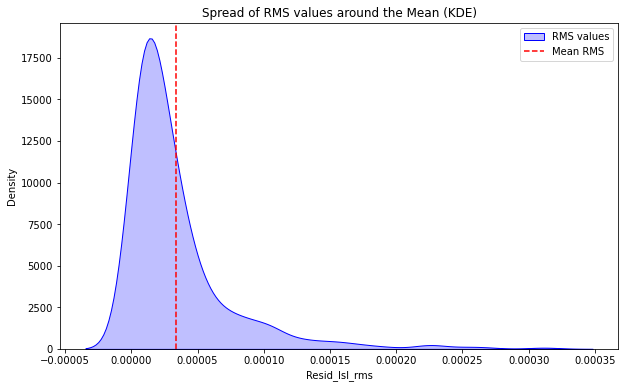

In [28]:
ms_values = df_1["Resid_Isl_rms"]

# Create KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(rms_values, shade=True, color="blue", label="RMS values")

# Add mean line
mean_rms = np.mean(rms_values)
plt.axvline(mean_rms, color='red', linestyle='--', label='Mean RMS')

# Add labels and title
plt.xlabel('Resid_Isl_rms')
plt.ylabel('Density')
plt.title('Spread of RMS values around the Mean (KDE)')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [16]:
print('Noise level of Mosaic2:')
print(rf'Mean RMS: {np.mean(df_2["Resid_Isl_rms"])}')
print(rf'Standard Deviation: {np.std(df_2["Resid_Isl_rms"])}')

Noise level of Mosaic2:
Mean RMS: 5.52051548188921e-05
Standard Deviation: 8.039981550946875e-05


In [21]:
print('Noise level of Mosaic4:')
print(rf'Mean RMS: {np.mean(df_4["Resid_Isl_rms"])}')
print(rf'Standard Deviation: {np.std(df_4["Resid_Isl_rms"])}')

Noise level of Mosaic4:
Mean RMS: 4.7038211956536536e-05
Standard Deviation: 8.884234143634912e-05


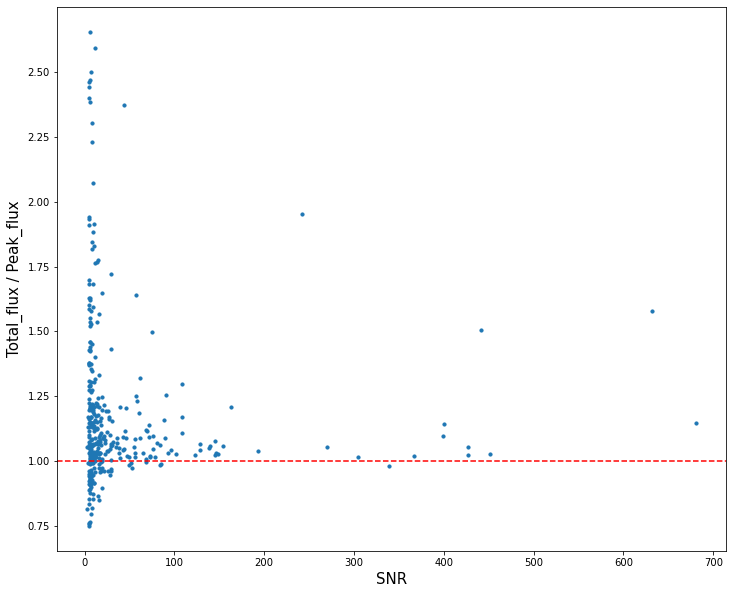

In [51]:
plt.figure(figsize=(12, 10))
plt.scatter(df_2['Peak_flux']/df_2["Isl_rms"], df_2['Total_flux']/df_2['Peak_flux'], s=10, marker='o')  # Adjusted marker size to 10
plt.axhline(1, color='red', linestyle='--')

# Labeling and title
plt.xlabel('SNR', fontsize=15)
plt.ylabel('Total_flux / Peak_flux', fontsize=15)
# plt.title('Scatter Plot of Total_flux / Peak_flux against Peak_flux', fontsize=15)

# Display the plot
plt.show()

# Comparing with NVSS

In [123]:
column_names_nvss = [
 "RA", "DEC", "Total_flux"
]

In [124]:
nvss_data = pd.read_csv('../info/NVSS_sources.dat', delim_whitespace=True, names=column_names_nvss)

In [125]:
nvss_data.shape

(686, 3)

In [126]:
nvss_data['Total_flux'] = nvss_data['Total_flux']*1e-3

In [127]:
nvss_data

,RA,DEC,Total_flux
0,51.45488,31.34658,0.00488
1,51.47592,30.81589,0.00330
2,51.48267,30.58467,0.00540
3,51.49700,31.48650,0.00759
4,51.52679,30.60064,0.00269
...,...,...,...
681,55.95617,30.45075,0.01972
682,55.96963,31.28728,0.00262
683,55.97050,30.68322,0.00517
684,55.98812,31.49578,0.02105


In [140]:
# Define the variation
variation = 0.2


# Compare the RA and DEC columns with the specified variation
# Use abs() to ensure we're comparing the absolute difference
comparison_result = (
    (abs(nvss_data['RA'] - merged_data['RA']) <= variation) & 
    (abs(nvss_data['DEC'] - merged_data['DEC']) <= variation)
)


In [141]:
matched_rows = nvss_data[comparison_result]

/var/folders/l1/vk05brrd5vgg5rxsglsqwbjh0000gn/T/ipykernel_27745/1306526584.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  matched_rows = nvss_data[comparison_result]


In [142]:
matched_rows_1 = merged_data[comparison_result]

In [143]:
matched_rows_1

,Source_id,Isl_id,RA,E_RA,DEC,E_DEC,Total_flux,E_Total_flux,Peak_flux,E_Peak_flux,...,E_DC_Min_img_plane,DC_PA_img_plane,E_DC_PA_img_plane,Isl_Total_flux,E_Isl_Total_flux,Isl_rms,Isl_mean,Resid_Isl_rms,Resid_Isl_mean,S_Code
187,187,174,53.067296,0.000494,31.673094,0.000328,0.001425,0.000181,0.001274,0.000095,...,0.000623,114.790869,10.029834,0.001156,0.000093,0.000095,-0.000026,0.000018,-0.000026,S
194,194,181,53.050254,0.000554,30.831807,0.000529,0.000972,0.000179,0.000894,0.000097,...,0.001217,22.794507,99.084330,0.000723,0.000077,0.000096,-0.000027,0.000016,-0.000026,S
200,200,187,53.031166,0.001138,30.203034,0.000887,0.000481,0.000165,0.000445,0.000090,...,0.002022,71.217820,57.637461,0.000250,0.000054,0.000089,-0.000021,0.000004,-0.000021,S
201,201,188,53.012820,0.000511,31.601497,0.000378,0.000891,0.000148,0.000944,0.000088,...,0.000825,0.000000,20.368741,0.000904,0.000115,0.000090,-0.000023,0.000007,-0.000024,C
217,217,201,52.948325,0.000926,30.778529,0.001051,0.000592,0.000191,0.000532,0.000102,...,0.001905,0.000000,47.726481,0.000312,0.000060,0.000100,-0.000028,0.000005,-0.000028,S
228,228,212,52.908829,0.000377,30.431202,0.000303,0.001622,0.000181,0.001464,0.000097,...,0.000650,118.864280,15.688596,0.001362,0.000093,0.000095,-0.000025,0.000014,-0.000025,S


In [144]:
matched_rows

,RA,DEC,Total_flux
187,52.88900,31.85197,0.01922
194,52.91921,30.67544,0.01373
200,52.95025,30.03958,0.00239
201,52.95892,31.46664,0.00560
217,53.04763,30.65858,0.00279
228,53.10850,30.58461,0.00350


In [145]:
total_flux_df1 = matched_rows['Total_flux']
total_flux_df2 = merged_data[merged_data.index.isin(matched_rows.index)]['Total_flux']

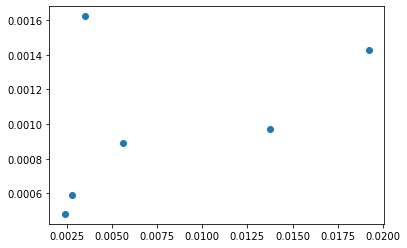

In [146]:
plt.scatter(total_flux_df1, total_flux_df2)